In [8]:
import torch
import pandas as pd
import plotly.express as px

In [41]:
def get_lr(scheduler, epochs):
    lr = []
    for epoch in range(epochs):
        lr.append(scheduler.get_last_lr()[0])
        optimizer.step()
        scheduler.step()
    return pd.DataFrame(dict(lr=lr))

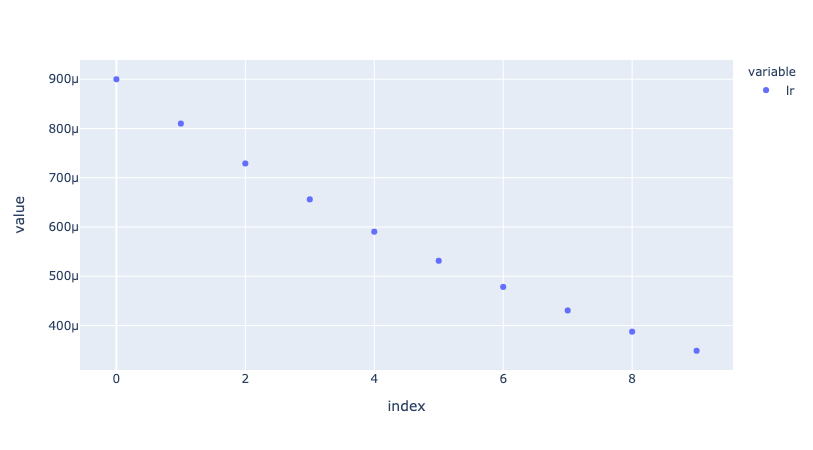

In [16]:
model = torch.nn.Linear(2, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
px.scatter(get_lr(scheduler, epochs=10))

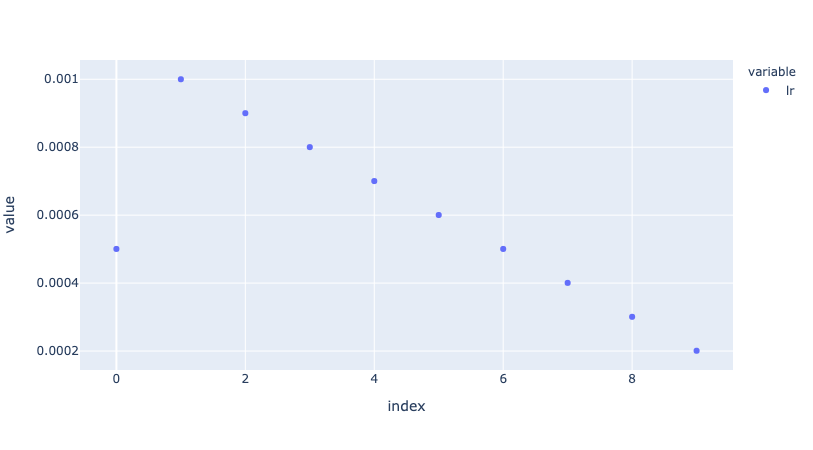

In [36]:
model = torch.nn.Linear(2, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CyclicLR(
    optimizer,
    base_lr=1e-6,
    max_lr=1e-3,
    step_size_up=2,
    step_size_down=10,
    cycle_momentum=False
)
px.scatter(get_lr(scheduler, epochs=10))

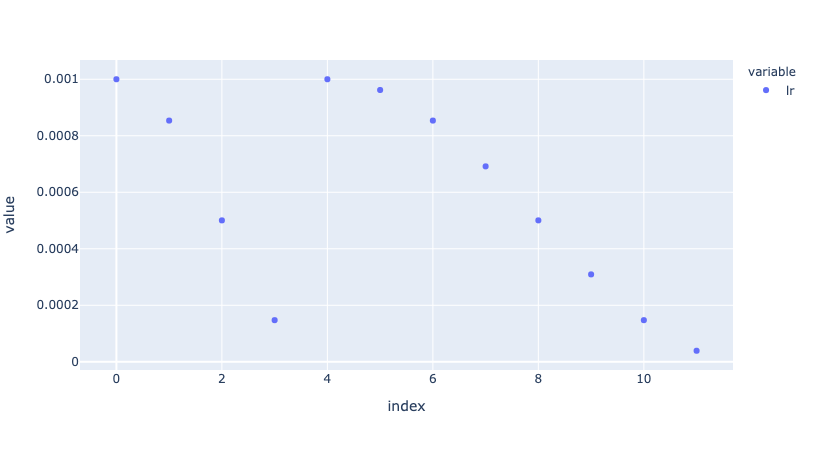

In [53]:
model = torch.nn.Linear(2, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer,
    T_0=4,
    T_mult=2,
    eta_min=1e-6,
)
px.scatter(get_lr(scheduler, epochs=12))

In [19]:
import catalyst.dl

In [21]:
import nncomp.registry as R

In [42]:
scheduler = R.SchedulerRegistry.get_from_params(**{
    "class": "OneCycleLRWithWarmup",
    "lr_range": (1e-3, 1e-6),
    "optimizer": optimizer,
    "num_steps": 1000,
    "warmup_steps": 100,
})

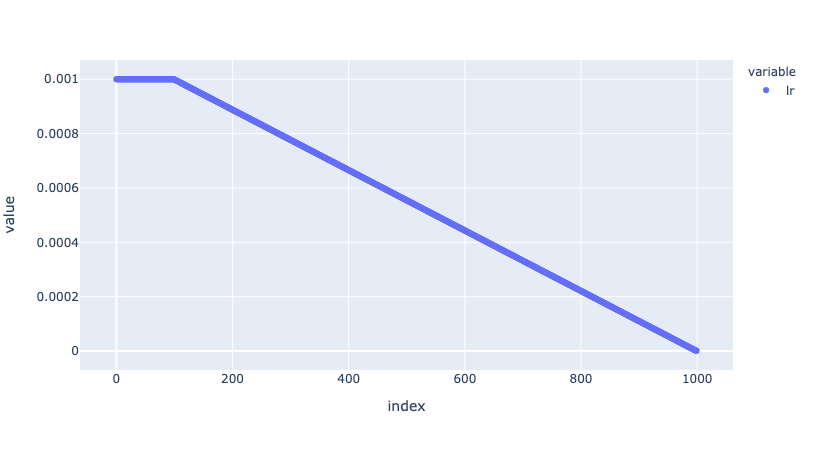

In [30]:
px.scatter(get_lr(scheduler, epochs=1000))